In [1]:
import pandas as pd

df = pd.read_csv('tweet.csv', encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = df[['target', 'text']]

# Convert 4 to 1 (positive), keep 0 as is (negative)
df['target'] = df['target'].apply(lambda x: 1 if x == 4 else 0)

df.head()


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
import re
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                                        # 1. Lowercase
    text = re.sub(r"http\S+", "", text)                        # 2. Remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)                      # 3. Remove mentions and hashtags
    text = re.sub(r"[^a-z\s]", "", text)                       # 4. Remove punctuation, numbers, emojis
    text = re.sub(r"\s+", " ", text).strip()                   # 5. Remove extra spaces

    # 6. Remove stopwords
    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

# Applying it to the dataset
df['clean_text'] = df['text'].apply(clean_text)


In [9]:
df[['text', 'clean_text']].head(10)

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see
5,@Kwesidei not the whole crew,whole crew
6,Need a hug,need hug
7,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rains bit bit lol im fin...
8,@Tatiana_K nope they didn't have it,nope didnt
9,@twittera que me muera ?,que muera


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize clean tweets
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text'])  # This is now your feature matrix

# Labels
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [16]:
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", accuracy)

# Detailed Metrics
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


✅ Accuracy: 0.773625

📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.75      0.77    159494
    Positive       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



c:\Users\mayan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


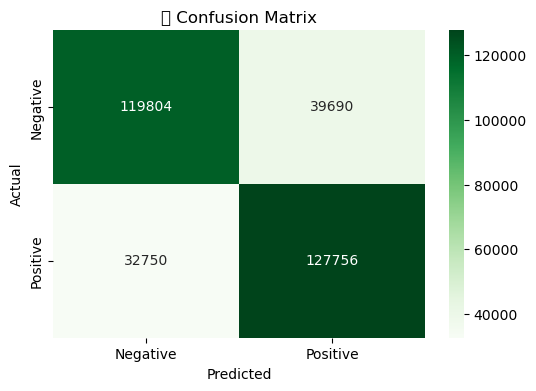

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🧾 Confusion Matrix")
plt.show()


In [ ]:
import os

os.makedirs('models', exist_ok=True)


In [22]:
import pickle

# Save trained Logistic Regression model
with open('models/sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save fitted TF-IDF vectorizer
with open('models/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
